In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
bigdata_path = './clean_data/bigdataset.csv'

In [25]:
data = pd.read_csv(bigdata_path)
data.head()

,Hãng xe,Dòng xe,Năm đăng ký,Số Km đã đi,Tình trạng,Loại xe,Dung tích xe,Xuất xứ,Chính sách bảo hành,Giá
0,Honda,Wave,1996,20000,Đã sử dụng,Xe số,100 - 175 cc,Đang cập nhật,Bảo hành hãng,1500000.0
1,Piaggio,Liberty,2014,3000,Đã sử dụng,Tay ga,100 - 175 cc,Đang cập nhật,Bảo hành hãng,9500000.0
2,Honda,Cub,1992,70000,Đã sử dụng,Xe số,50 - 100 cc,Đang cập nhật,Bảo hành hãng,12000000.0
3,Yamaha,Exciter,2014,29000,Đã sử dụng,Xe số,100 - 175 cc,Đang cập nhật,Bảo hành hãng,9300000.0
4,Yamaha,Nouvo,2011,55555,Đã sử dụng,Tay ga,50 - 100 cc,Đang cập nhật,Bảo hành hãng,6200000.0


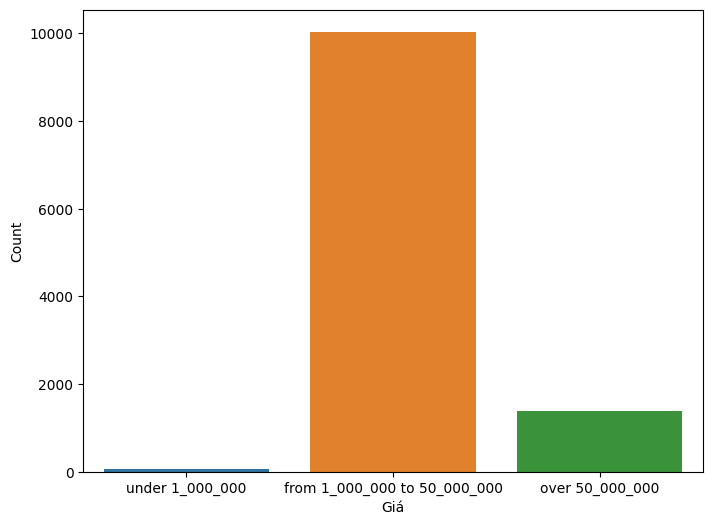

In [26]:
under_1_000_000 =  data[data['Giá'] <= 1_000_000]['Giá'].count()
from_1_000_000_to_50_000_000 = data[(data['Giá'] > 1_000_000) & (data['Giá'] <= 50_000_000)]['Giá'].count()
over_50_000_000 = data[data['Giá'] > 50_000_000]['Giá'].count()
price = pd.DataFrame({'Giá': ['under 1_000_000', 'from 1_000_000 to 50_000_000', 'over 50_000_000'],
                      'Count': [under_1_000_000, from_1_000_000_to_50_000_000, over_50_000_000]})
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(data=price, x='Giá', y='Count', ax=ax)
plt.show()

In [27]:
data = data[(data['Giá'] < 50000000) & (data['Giá'] > 1000000)]

<h2>Dữ liệu chữ</h2>

1.Hãng xe

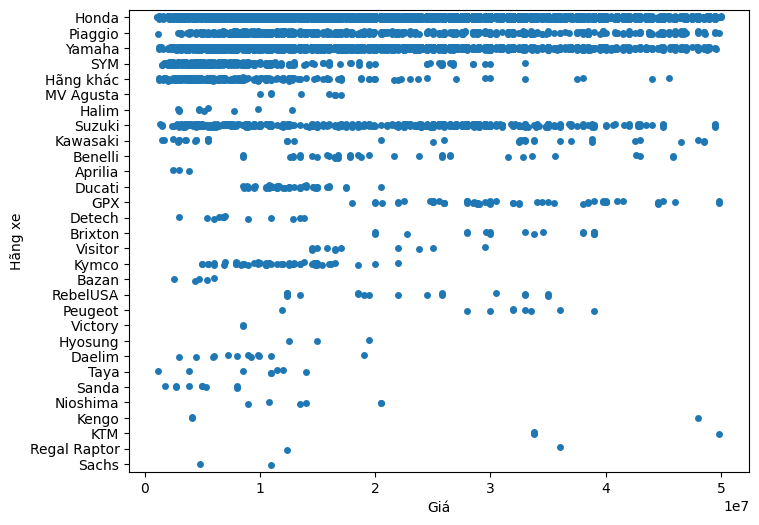

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
sns.stripplot(data=data, y='Hãng xe', x='Giá', ax=ax)
plt.show()

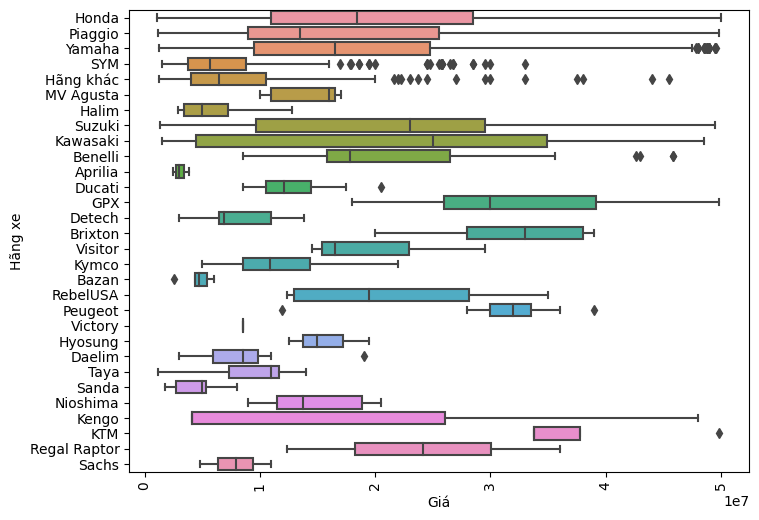

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=data, y='Hãng xe', x='Giá', ax=ax)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

2.Dòng xe

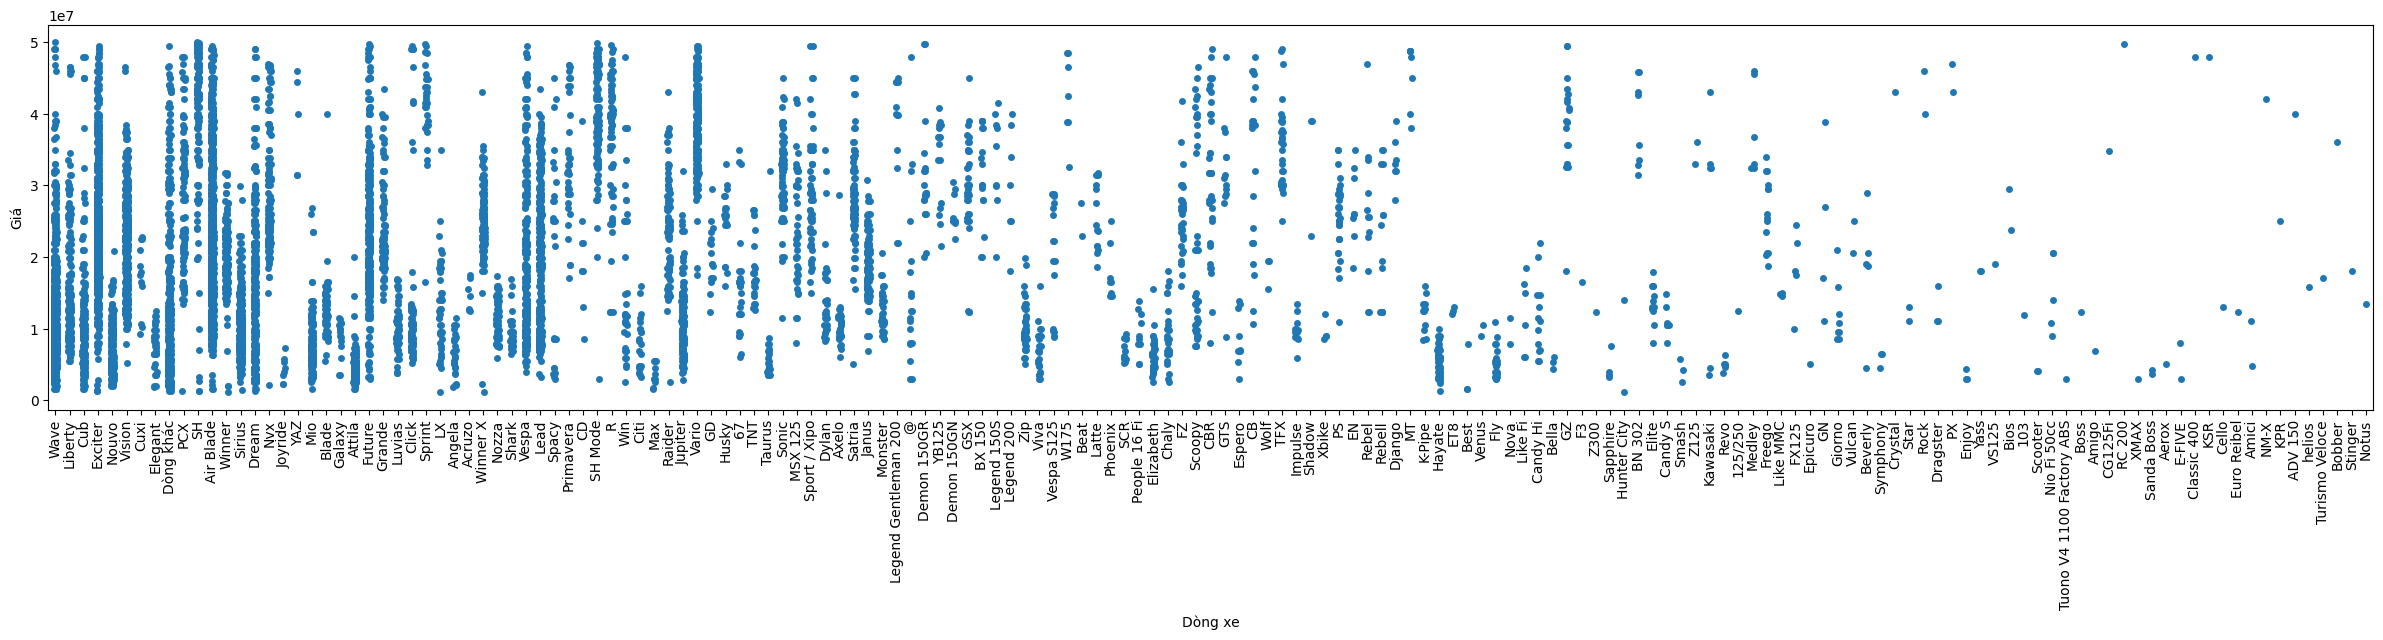

In [30]:
fig, ax = plt.subplots(figsize=(30,5))
sns.stripplot(data=data, x='Dòng xe', y='Giá', ax=ax)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

3.Tình trạng

In [31]:
data['Tình trạng'].unique()

array(['Đã sử dụng'], dtype=object)

Mọi giá trị trong cột 'Tình trạng' đều là 'Đã sử dụng'

4.Loại xe

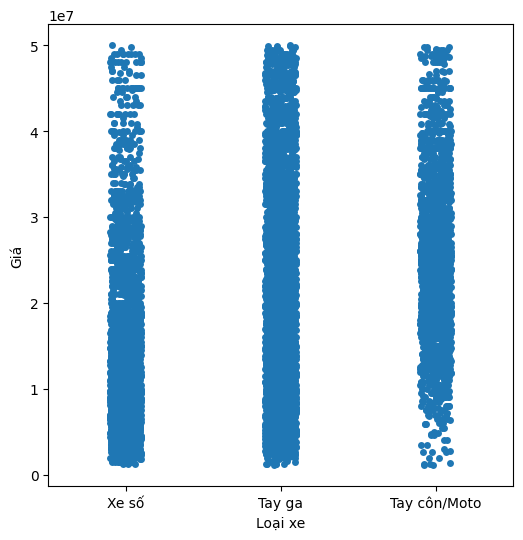

In [32]:
fig, ax = plt.subplots(figsize=(6,6))
sns.stripplot(data=data, x='Loại xe', y='Giá', ax=ax)
plt.show()

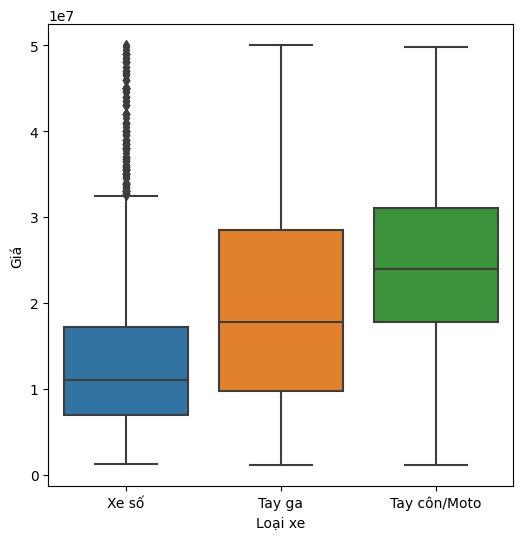

In [33]:
fig, ax = plt.subplots(figsize=(6,6))
sns.boxplot(data=data, x='Loại xe', y='Giá', ax=ax)
plt.show()

5.Dung tích xe

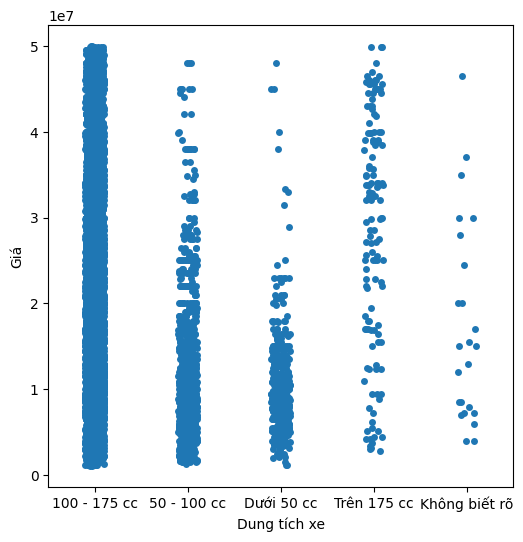

In [34]:
fig, ax = plt.subplots(figsize=(6,6))
sns.stripplot(data=data, x='Dung tích xe', y='Giá', ax=ax)
plt.show()

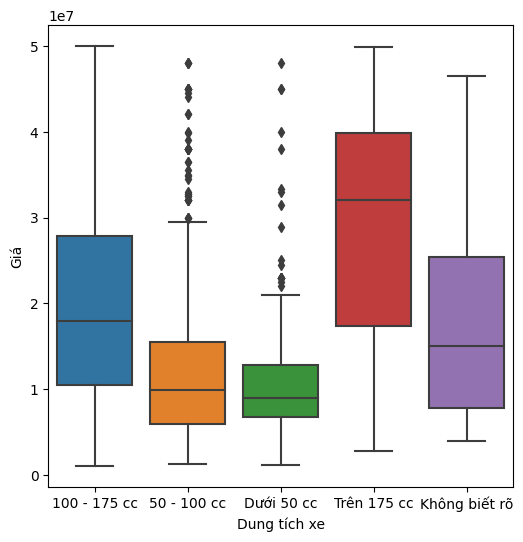

In [35]:
fig, ax = plt.subplots(figsize=(6,6))
sns.boxplot(data=data, x='Dung tích xe', y='Giá', ax=ax)
plt.show()

6.Xuất xứ

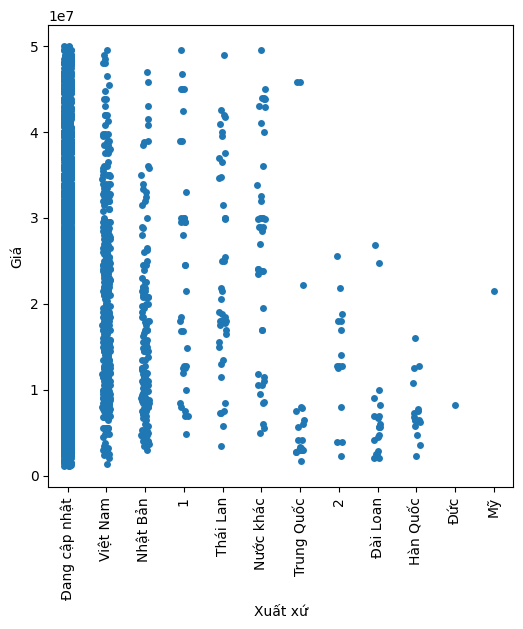

In [36]:
fig, ax = plt.subplots(figsize=(6,6))
sns.stripplot(data=data, x='Xuất xứ', y='Giá', ax=ax)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [37]:
data[data['Xuất xứ']=='Đang cập nhật']['Xuất xứ'].count()/data.shape[0]

0.924245452728363

92.4% giá trị trong cột 'Xuất xứ' là 'Đang cập nhật'

8.Chính sách bảo hành

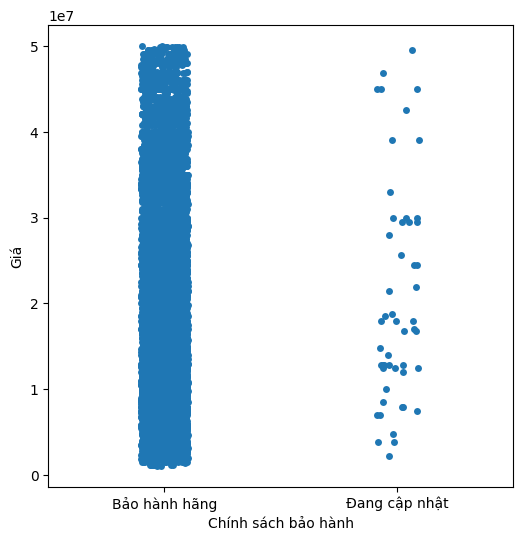

In [38]:
fig, ax = plt.subplots(figsize=(6,6))
sns.stripplot(data=data, x='Chính sách bảo hành', y='Giá', ax=ax)
plt.show()

In [39]:
data[data['Chính sách bảo hành']=='Bảo hành hãng']['Chính sách bảo hành'].count()/data.shape[0]

0.9949030581651009

99.49% giá trị trong cột 'Chính sách bảo hành' là 'Bảo hành hãng'

Kết luận: Bỏ qua đặc trưng 'Tình trạng', 'Xuất xứ' và 'Chính sách bảo hành'

<h2>Dữ liệu số</h2>

1.Năm đăng ký

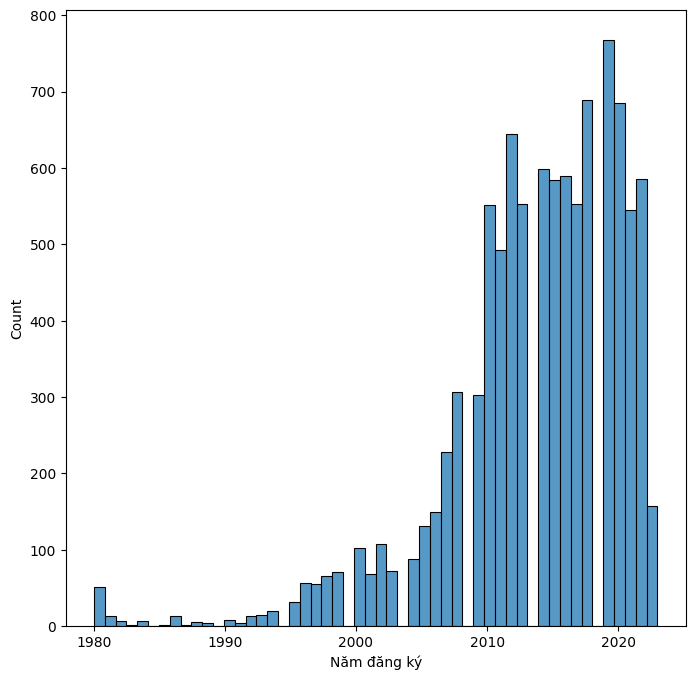

In [40]:
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(data=data, x="Năm đăng ký", ax=ax)
plt.show()

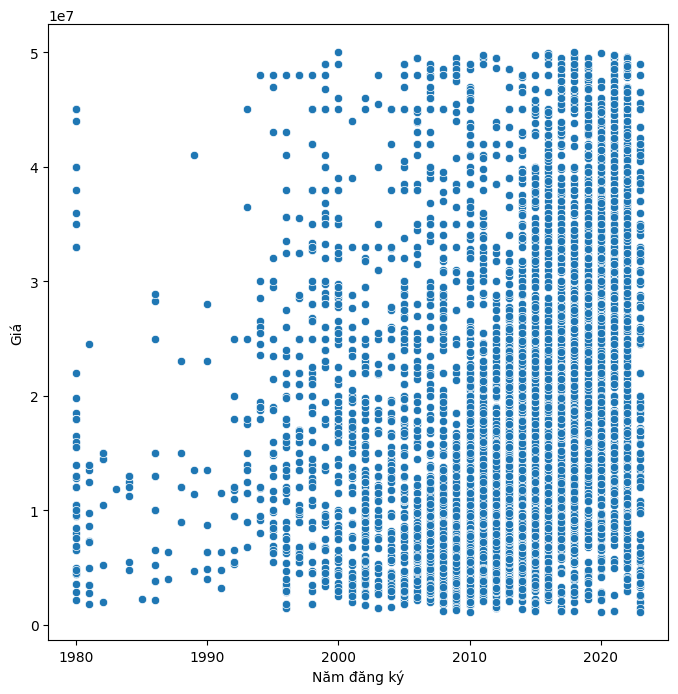

In [41]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=data, x="Năm đăng ký", y="Giá", ax=ax)
plt.show()

2.Giá

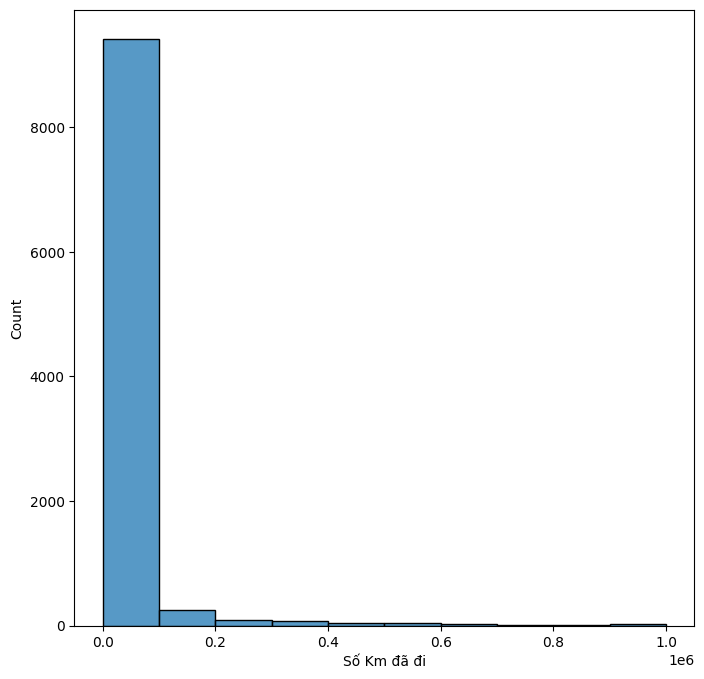

In [42]:
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(data=data, x="Số Km đã đi", bins=10, ax=ax)
plt.show()

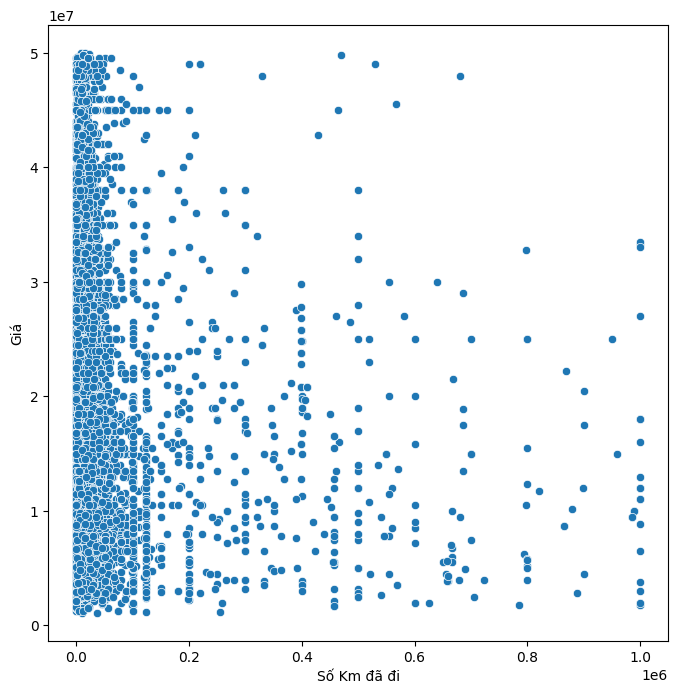

In [43]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=data, x="Số Km đã đi", y="Giá", ax=ax)
plt.show()

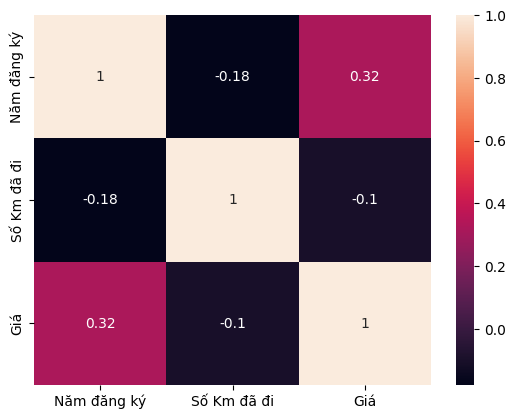

In [44]:
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.show()

Kết luận:
<ul>
<li>Độ tương quan giữa 'Năm đăng ký' và 'Giá' không quá cao</li>
<li>Độ tương quan giữa 'Số Km đã đi' và 'Giá' khá thấp</li>
</ul>